# Informe de desempeño — Alura Store

**Objetivo:** Identificar cuál tienda de las cuatro es la menos eficiente y, por ende, la más recomendable para vender.  
**Metodología:** Se analizan métricas clave —facturación, calificaciones, envío promedio—, se normalizan, se combinan en un *score* ponderado, y se generan visualizaciones para apoyar la decisión.


Importaciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

1. Carga y vista preliminar de datos

In [ ]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas = {
    "Tienda 1": pd.read_csv(url),
    "Tienda 2": pd.read_csv(url2),
    "Tienda 3": pd.read_csv(url3),
    "Tienda 4": pd.read_csv(url4),
}

for nombre, df in tiendas.items():
    print(f"\n🔎 {nombre} — Registros: {len(df)}")
    display(df.head(2))


🔎 Tienda 1 — Registros: 2359


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359



🔎 Tienda 2 — Registros: 2359


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359



🔎 Tienda 3 — Registros: 2359


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250



🔎 Tienda 4 — Registros: 2358


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782


*1*. Análisis de facturación


In [ ]:
def calcular_facturacion(df):
    return df["Precio"].sum()

facturacion = {nombre: calcular_facturacion(df) for nombre, df in tiendas.items()}

facturacion_df = pd.DataFrame.from_dict(facturacion, orient="index", columns=["Facturación"])
facturacion_df = facturacion_df.sort_values(by="Facturación", ascending=False)

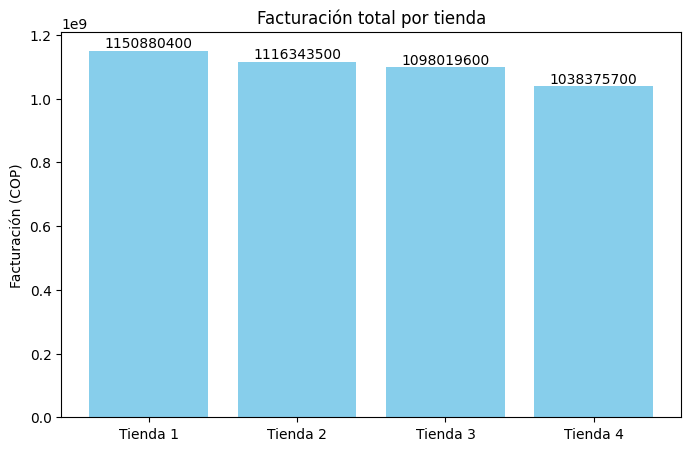

,Facturación
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


In [ ]:
# Gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(facturacion_df.index, facturacion_df["Facturación"], color="skyblue")
plt.bar_label(bars, fmt="%.0f")
plt.title("Facturación total por tienda")
plt.ylabel("Facturación (COP)")
plt.show()

display(facturacion_df)

2.Ventas por categoría

In [ ]:
all_stores_df = pd.concat(tiendas.values())
ventas_categoria = all_stores_df.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

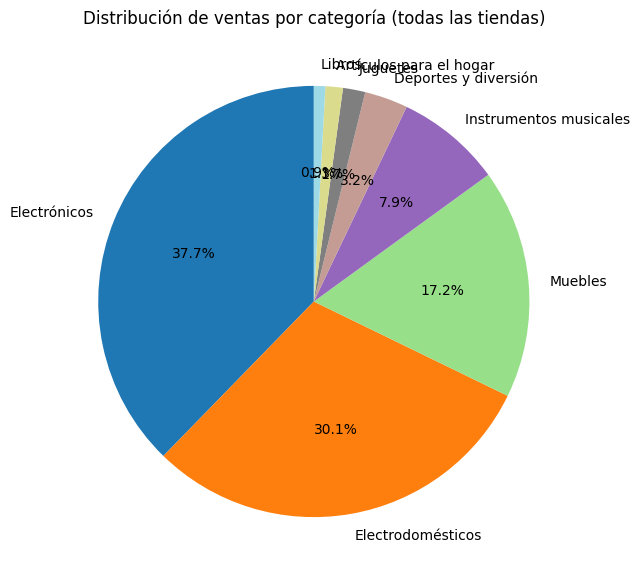

,Precio
Categoría del Producto,
Electrónicos,1.660576e+09
Electrodomésticos,1.324751e+09
Muebles,7.576610e+08
Instrumentos musicales,3.487726e+08
Deportes y diversión,1.429777e+08
Juguetes,7.360440e+07
Artículos para el hogar,5.757980e+07
Libros,3.769610e+07


In [ ]:
# Gráfico circular
plt.figure(figsize=(7,7))
ventas_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="tab20")
plt.title("Distribución de ventas por categoría (todas las tiendas)")
plt.ylabel("")
plt.show()

display(ventas_categoria)

3.Calificación promedio de la tienda

In [ ]:
def promedio_calificacion(df):
    return df["Calificación"].mean()

calificaciones = {nombre: promedio_calificacion(df) for nombre, df in tiendas.items()}

calificaciones_df = pd.DataFrame.from_dict(calificaciones, orient="index", columns=["Calificación Promedio"])


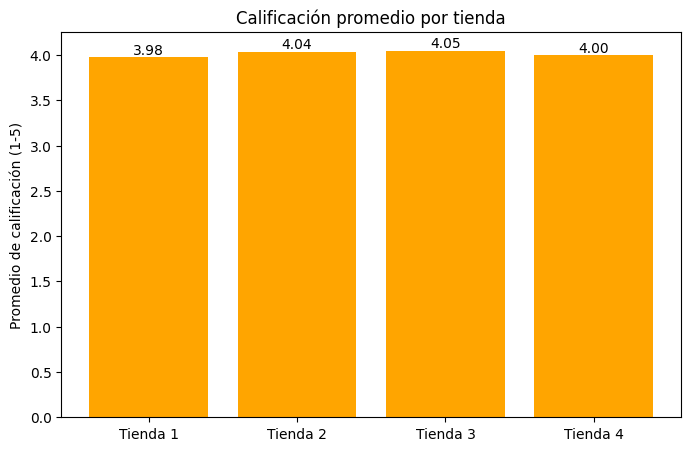

,Calificación Promedio
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


In [ ]:
# Gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(calificaciones_df.index, calificaciones_df["Calificación Promedio"], color="orange")
plt.bar_label(bars, fmt="%.2f")
plt.title("Calificación promedio por tienda")
plt.ylabel("Promedio de calificación (1-5)")
plt.show()

display(calificaciones_df)

4.Productos más y menos vendidos

In [ ]:
productos_vendidos = all_stores_df["Producto"].value_counts()
top5 = productos_vendidos.head(5)
bottom5 = productos_vendidos.tail(5)


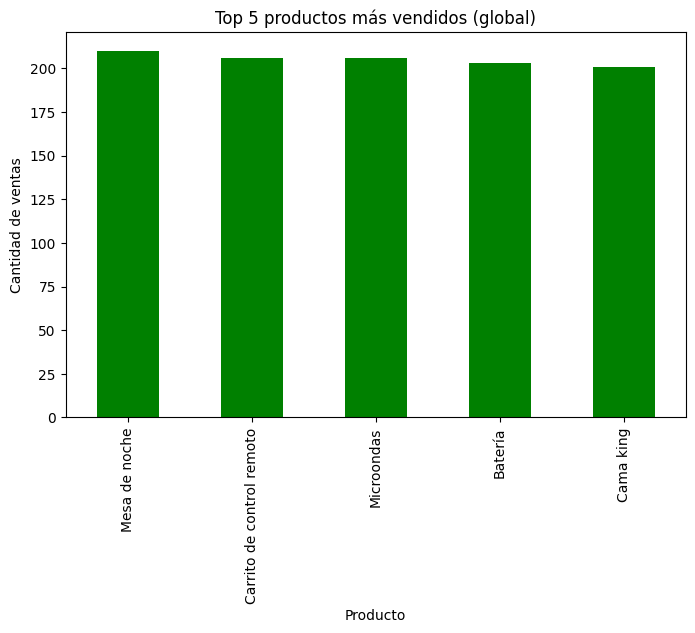

,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201


In [ ]:
# Gráfico top 5
plt.figure(figsize=(8,5))
bars = top5.plot(kind="bar", color="green")
plt.title("Top 5 productos más vendidos (global)")
plt.ylabel("Cantidad de ventas")
plt.show()

display(top5)


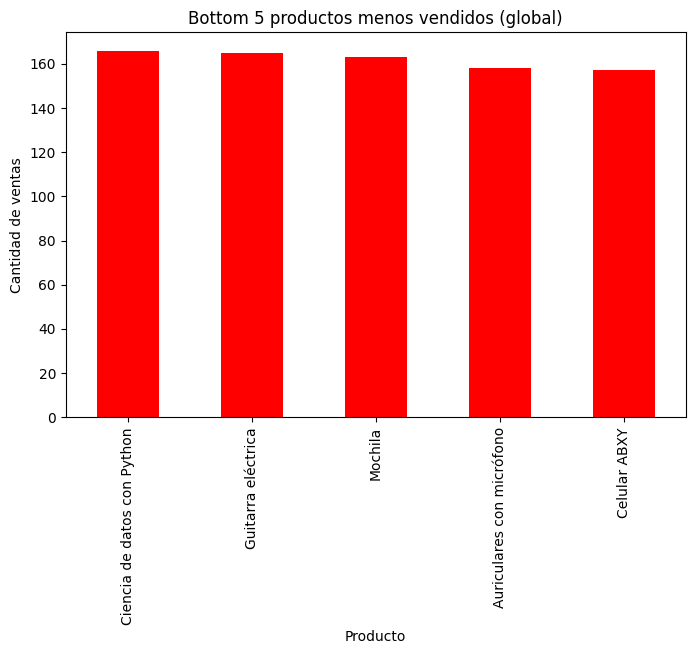

,count
Producto,
Ciencia de datos con Python,166
Guitarra eléctrica,165
Mochila,163
Auriculares con micrófono,158
Celular ABXY,157


In [ ]:
# Gráfico bottom 5
plt.figure(figsize=(8,5))
bars = bottom5.plot(kind="bar", color="red")
plt.title("Bottom 5 productos menos vendidos (global)")
plt.ylabel("Cantidad de ventas")
plt.show()

display(bottom5)


5. Envío promedio por tienda


In [ ]:
def promedio_envio(df):
    return df["Costo de envío"].mean()

envios = {nombre: promedio_envio(df) for nombre, df in tiendas.items()}

envios_df = pd.DataFrame.from_dict(envios, orient="index", columns=["Envío Promedio"])

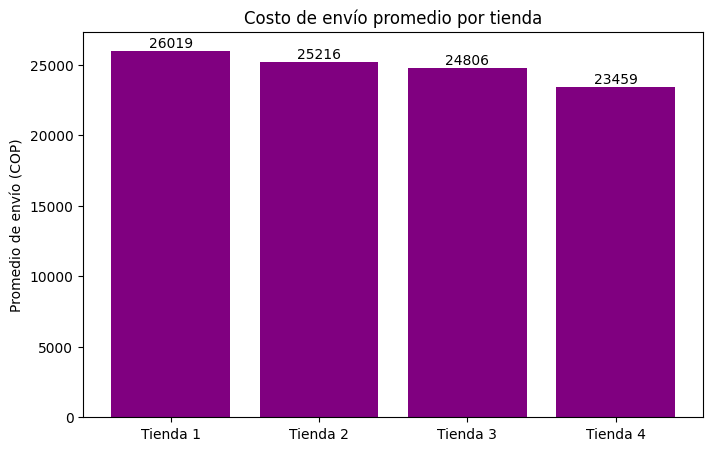

,Envío Promedio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


In [ ]:
# Gráfico
plt.figure(figsize=(8,5))
bars = plt.bar(envios_df.index, envios_df["Envío Promedio"], color="purple")
plt.bar_label(bars, fmt="%.0f")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Promedio de envío (COP)")
plt.show()

display(envios_df)

In [ ]:
# Unir métricas
resumen = facturacion_df.join(calificaciones_df).join(envios_df)

# Normalización
resumen_norm = resumen.copy()
resumen_norm["Facturación_norm"] = resumen_norm["Facturación"] / resumen_norm["Facturación"].max()
resumen_norm["Calificación_norm"] = resumen_norm["Calificación Promedio"] / resumen_norm["Calificación Promedio"].max()
resumen_norm["Envío_norm"] = 1 - (resumen_norm["Envío Promedio"] / resumen_norm["Envío Promedio"].max())  # Menor envío es mejor

# Score ponderado
resumen_norm["Score"] = (
    resumen_norm["Facturación_norm"] * 0.4 +
    resumen_norm["Calificación_norm"] * 0.4 +
    resumen_norm["Envío_norm"] * 0.2
)

# Ordenar
resumen_final = resumen_norm.sort_values(by="Score", ascending=False)

print("📊 Resumen de desempeño por tienda:\n")
display(resumen_final[["Facturación","Calificación Promedio","Envío Promedio","Score"]])


📊 Resumen de desempeño por tienda:



,Facturación,Calificación Promedio,Envío Promedio,Score
Tienda 2,1.116344e+09,4.037304,25216.235693,0.793075
Tienda 1,1.150880e+09,3.976685,26018.609580,0.792921
Tienda 3,1.098020e+09,4.048326,24805.680373,0.790951
Tienda 4,1.038376e+09,3.995759,23459.457167,0.775376


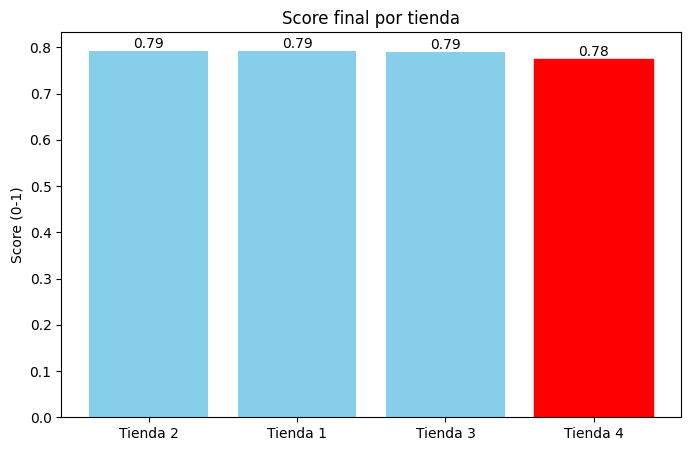

In [ ]:

# Gráfico del score
plt.figure(figsize=(8,5))
bars = plt.bar(resumen_final.index, resumen_final["Score"], color="skyblue")
bars[-1].set_color("red")  # Destacar peor tienda
plt.bar_label(bars, fmt="%.2f")
plt.title("Score final por tienda")
plt.ylabel("Score (0-1)")
plt.show()

Conclusión y recomendación

Al comparar el desempeño de las cuatro tiendas en distintos aspectos, la Tienda 4 muestra un perfil menos competitivo frente a las demás.

Aspectos positivos:

Tiene los costos de envío más bajos.
Logra vender con cierta frecuencia en categorías de menor valor, como juguetes o artículos para el hogar.
Aspectos negativos:

Sus ventas totales son las más bajas.
No logra posicionarse en productos de mayor valor.
Las evaluaciones de los clientes no son tan buenas como en otras tiendas.
El rendimiento en artículos de mayor precio es débil.
Recomendación:

La Tienda 4 es la candidata más lógica para ser vendida.

Motivos:

Genera menos ingresos que el resto.
Carece de un papel destacado en las categorías clave.
Su ventaja en costos de envío no alcanza para compensar sus debilidades en facturación y satisfacción del cliente.
Desprenderse de esta tienda liberaría recursos que el Sr. Juan podría usar en un nuevo emprendimiento con mayor proyección o para impulsar las tiendas que hoy muestran mejores resultados.